<a href="https://colab.research.google.com/github/KhumairahErnas/Tugas4_DeepLearning_Yolo/blob/main/Deteksi_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
!pip install roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

# model YOLOv8n
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="g75zK0Q9IftO0vnFE5Ky")
project = rf.workspace("tugas4deeplearning").project("deteksi-helm-kaos-sepatu-tas")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-Helm-Kaos-Sepatu-Tas-1 in yolov8:: 100%|██████████| 2292/2292 [00:00<00:00, 8265.80it/s]


In [ ]:
# Training
!yolo task=detect mode=train model=yolov8n.pt data=Deteksi-Helm-Kaos-Sepatu-Tas-1/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Deteksi-Helm-Kaos-Sepatu-Tas-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

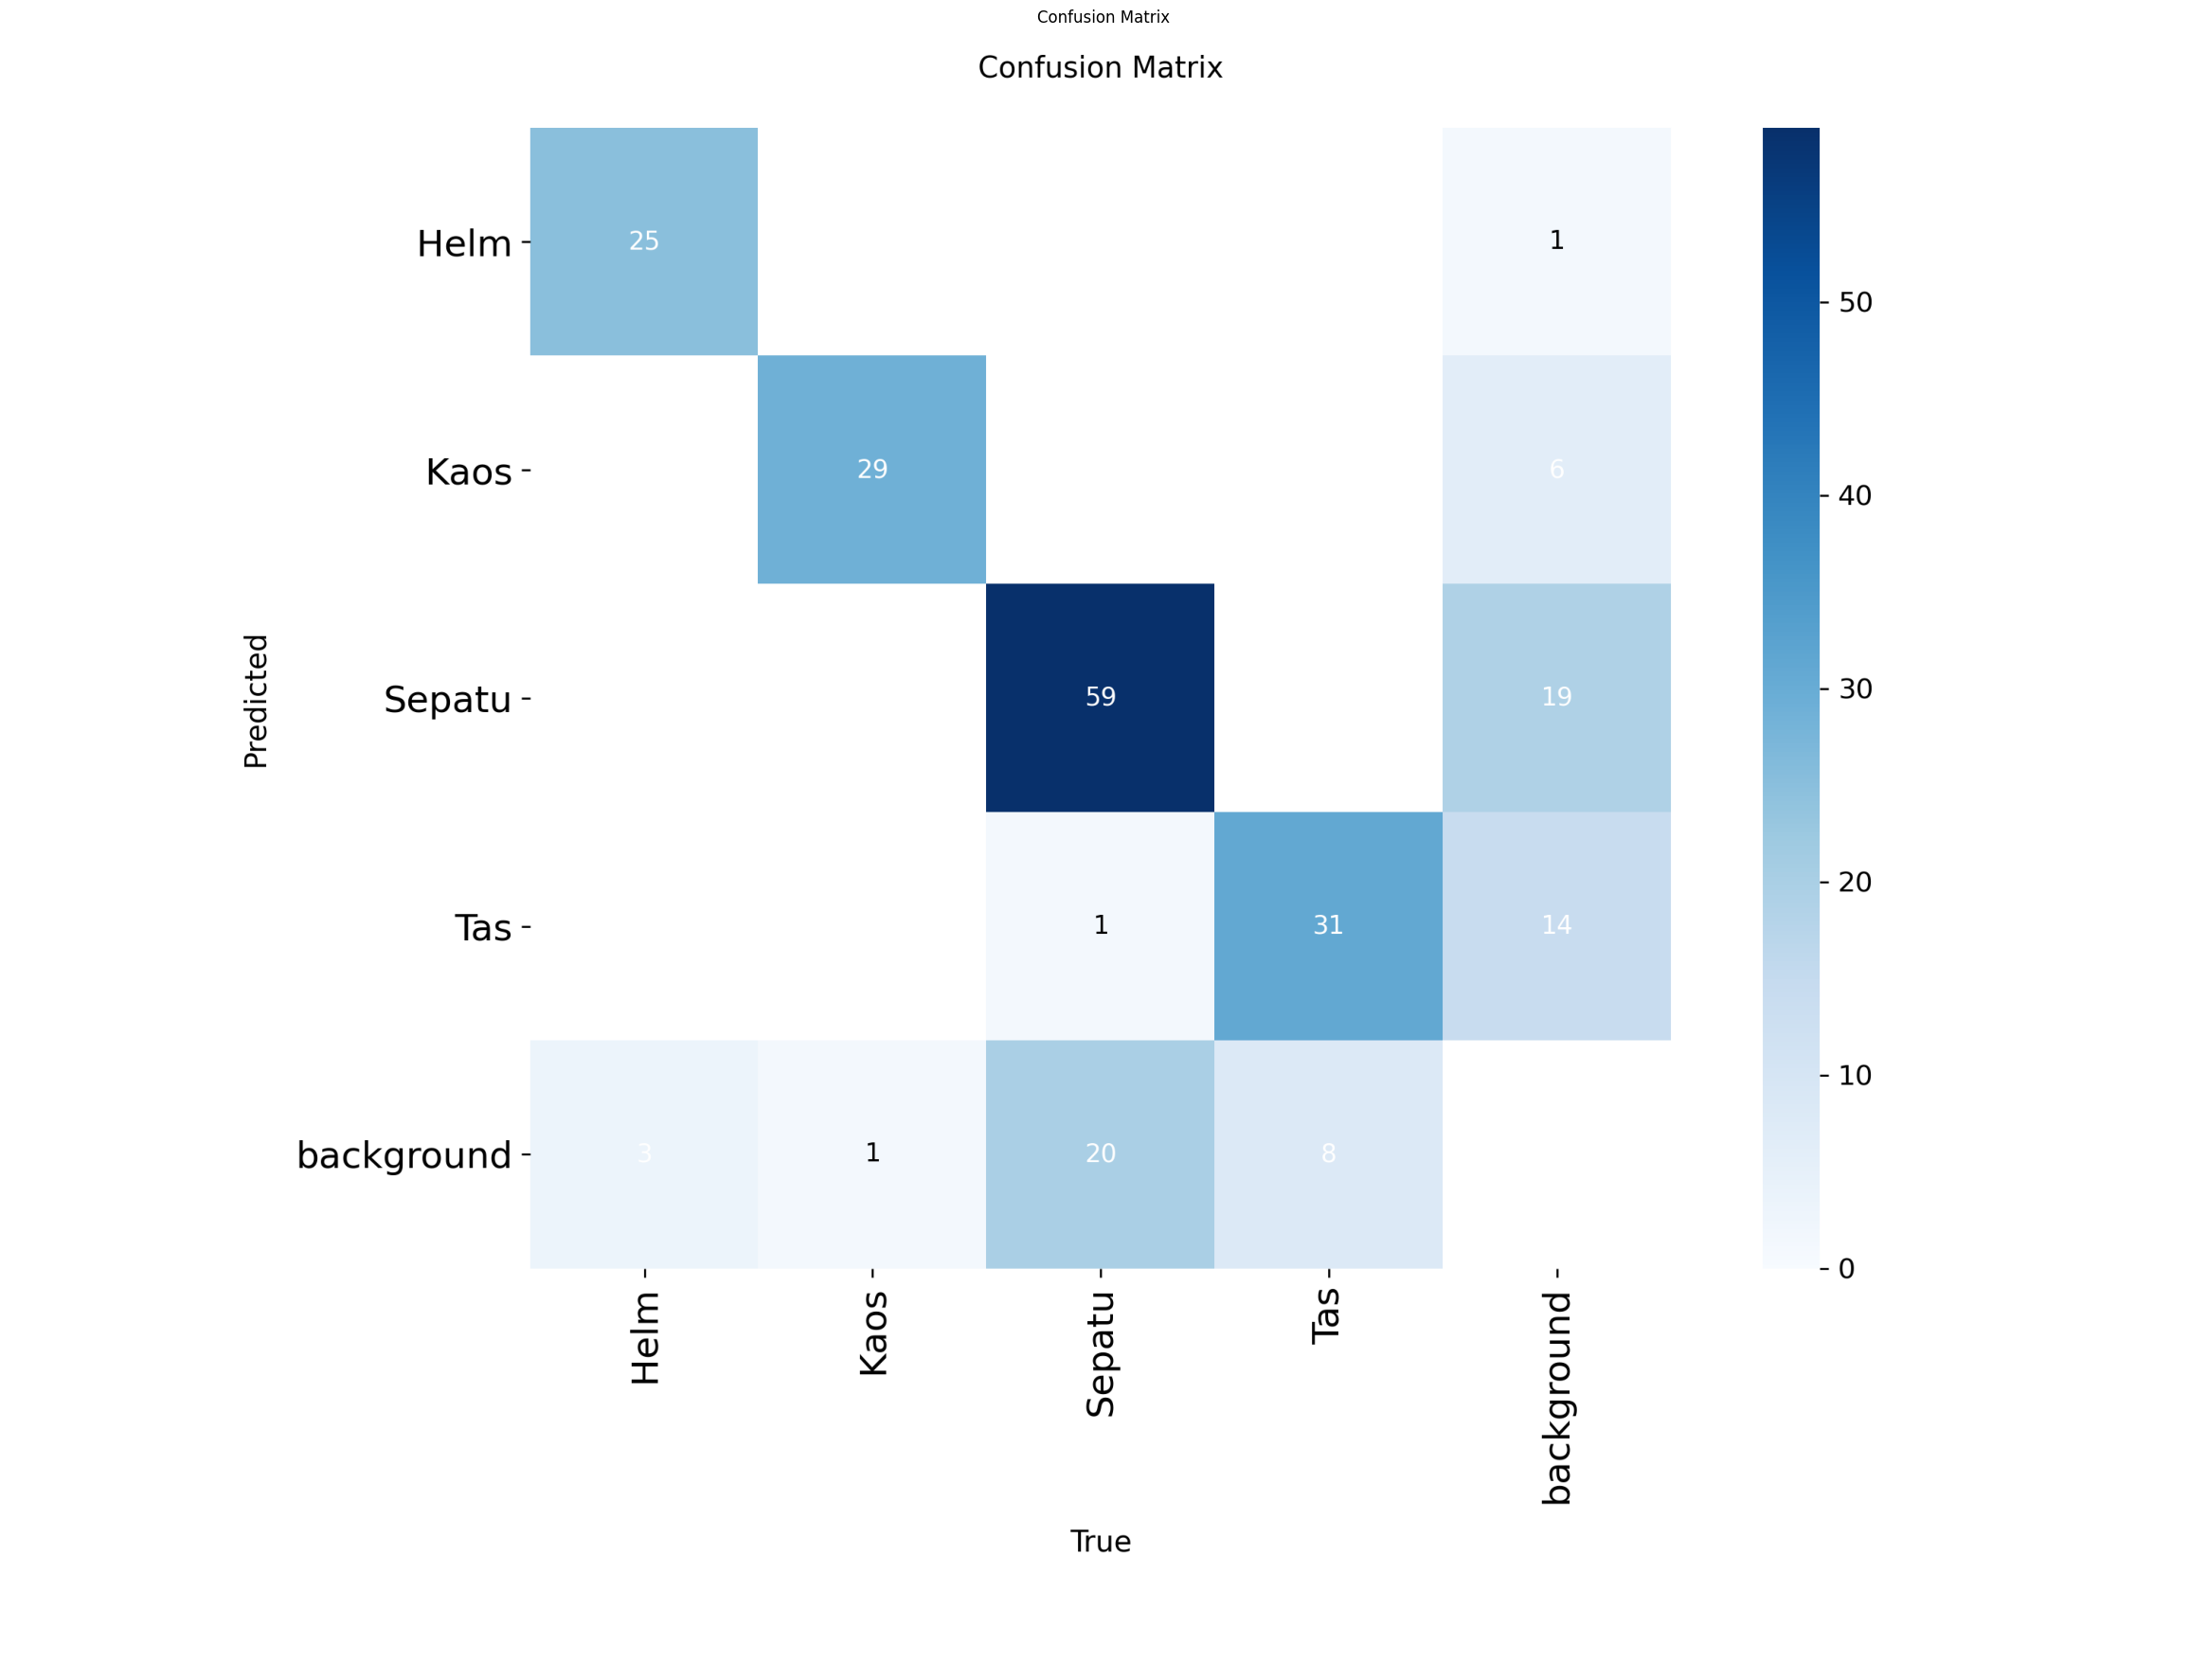

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/runs/detect/train/confusion_matrix.png"
img = Image.open(img_path)

w, h = img.size
dpi = 100

plt.figure(figsize=(w/dpi, h/dpi), dpi=dpi)
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix", fontsize=12)
plt.show()

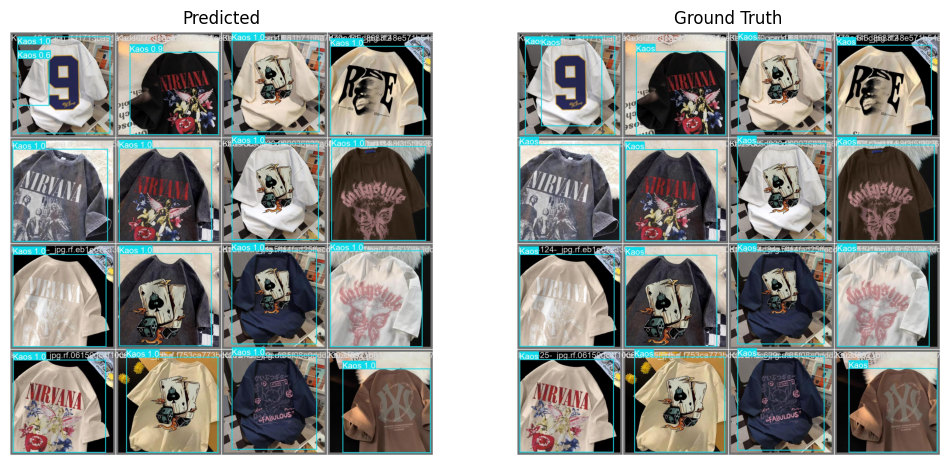

In [ ]:
pred = Image.open("runs/detect/train/val_batch1_pred.jpg")
labels = Image.open("runs/detect/train/val_batch1_labels.jpg")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pred)
plt.axis('off')
plt.title("Predicted")

plt.subplot(1, 2, 2)
plt.imshow(labels)
plt.axis('off')
plt.title("Ground Truth")

plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")  # model hasil training

# Prediksi 10 gambar
results_img = model.predict(source="/content/drive/MyDrive/Deteksi Yolo ", save=True, verbose=False)

# Prediksi video
results_vid = model.predict(source="/content/drive/MyDrive/Deteksi Yolo /VIDEO.mp4", save=True, verbose=False)

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to runs/detect/predict2
WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r

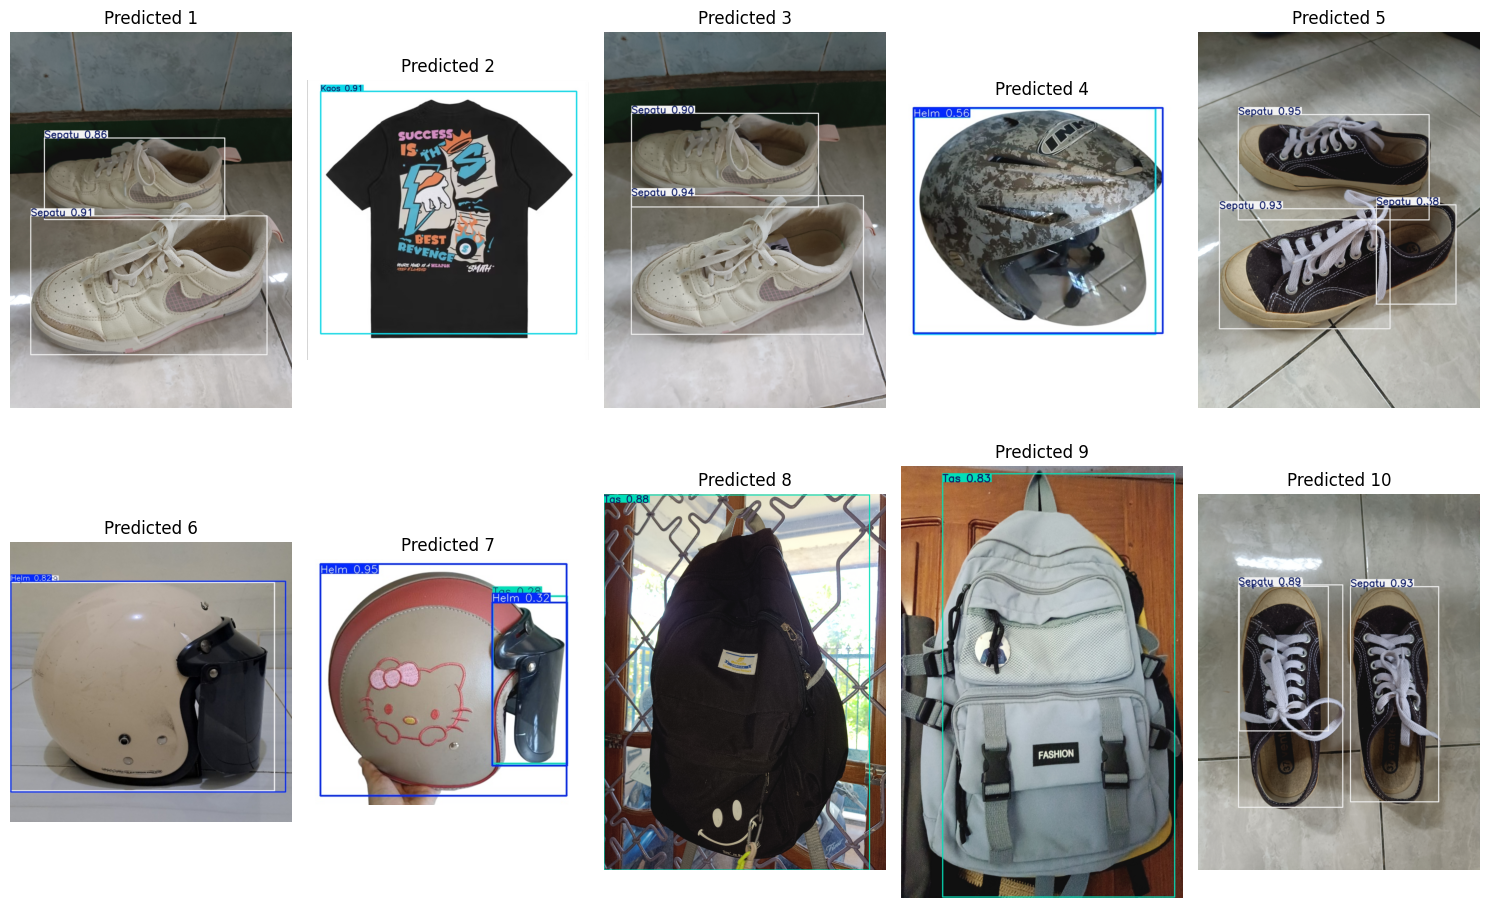

In [ ]:
import glob
import matplotlib.pyplot as plt
from PIL import Image # Import Image from PIL

predicted_images = glob.glob("runs/detect/predict2/*.jpg")

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(predicted_images[:10]):
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted {i+1}")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Konversi video hasil prediksi dari .avi ke .mp4
import os

input_video = "/content/runs/detect/predict2/VIDEO.avi"
output_video = "/content/runs/detect/predict2/VIDEO.mp4"

# Konversi dengan ffmpeg
!ffmpeg -y -i "{input_video}" -vcodec libx264 -acodec aac "{output_video}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_path = "/content/runs/detect/predict2/VIDEO.mp4"

# Buka dan encode video ke base64
with open(video_path, "rb") as f:
    video_data = f.read()
    video_b64 = b64encode(video_data).decode()

# Tampilkan video di notebook
HTML(f"""

""")